#Cosmos_Crew

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"himanshuberad","key":"da7aa8f9a27940bd26d95898b2f7f470"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                                   title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                          Global Country Information Dataset 2023             23KB  2023-07-08 20:37:33          11843        473  1.0              
nelgiriyewithana/global-youtube-statistics-2023                       Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38           3870        137  1.0              
joebeachcapital/global-earth-temperatures                             Global Earth Temperatures                           33KB  2023-08-09 06:21:51            808         29  1.0              
arnavsmayan/netflix-userbase-datase

In [ ]:
!kaggle datasets download -d jiayuanchengala/aid-scene-classification-datasets

100% 2.44G/2.45G [00:29<00:00, 133MB/s]
100% 2.45G/2.45G [00:29<00:00, 89.4MB/s]


In [ ]:
!unzip /content/aid-scene-classification-datasets.zip

Streaming output truncated to the last 5000 lines.
  inflating: AID/Mountain/mountain_289.jpg  
  inflating: AID/Mountain/mountain_29.jpg  
  inflating: AID/Mountain/mountain_290.jpg  
  inflating: AID/Mountain/mountain_291.jpg  
  inflating: AID/Mountain/mountain_292.jpg  
  inflating: AID/Mountain/mountain_293.jpg  
  inflating: AID/Mountain/mountain_294.jpg  
  inflating: AID/Mountain/mountain_295.jpg  
  inflating: AID/Mountain/mountain_296.jpg  
  inflating: AID/Mountain/mountain_297.jpg  
  inflating: AID/Mountain/mountain_298.jpg  
  inflating: AID/Mountain/mountain_299.jpg  
  inflating: AID/Mountain/mountain_3.jpg  
  inflating: AID/Mountain/mountain_30.jpg  
  inflating: AID/Mountain/mountain_300.jpg  
  inflating: AID/Mountain/mountain_301.jpg  
  inflating: AID/Mountain/mountain_302.jpg  
  inflating: AID/Mountain/mountain_303.jpg  
  inflating: AID/Mountain/mountain_304.jpg  
  inflating: AID/Mountain/mountain_305.jpg  
  inflating: AID/Mountain/mountain_306.jpg  
  inflat

Model creation

**Importing all need libraries**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

import keras
from keras.layers import Flatten,Dense
from keras.models import Model
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.preprocessing.image import ImageDataGenerator

**Downloading VGG19 pretrained model**

In [ ]:
base_model=VGG19(input_shape=(600,600,3),include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable=False

**Connecting base model to output layer having two classes**

In [ ]:
X=Flatten()(base_model.output)
X=Dense(units=30,activation='softmax')(X)

model=Model(base_model.input,X)
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 600, 600, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 600, 600, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 600, 600, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 300, 300, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 300, 300, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 300, 300, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 150, 150, 128)     0     

**Preprocessing the train data**

In [ ]:
datagen=ImageDataGenerator(featurewise_center=True,
                                 rotation_range=0.4,
                                 width_shift_range=0.3,
                                 horizontal_flip=True,
                                 preprocessing_function=preprocess_input,
                                 zoom_range=0.4,
                                 shear_range=0.4,
                                 validation_split=0.1
                                 )

In [ ]:
# generating batches of training and validation data
train_generator = datagen.flow_from_directory(
    '/content/AID',
    target_size=(600, 600),
    batch_size=32,
    subset='training'
)

val_generator = datagen.flow_from_directory(
    '/content/AID',
    target_size=(600, 600),
    batch_size=32,
    subset='validation'
)

Found 9000 images belonging to 30 classes.
Found 1000 images belonging to 30 classes.


In [ ]:
train_generator.class_indices
val_generator.class_indices

{'Airport': 0,
 'BareLand': 1,
 'BaseballField': 2,
 'Beach': 3,
 'Bridge': 4,
 'Center': 5,
 'Church': 6,
 'Commercial': 7,
 'DenseResidential': 8,
 'Desert': 9,
 'Farmland': 10,
 'Forest': 11,
 'Industrial': 12,
 'Meadow': 13,
 'MediumResidential': 14,
 'Mountain': 15,
 'Park': 16,
 'Parking': 17,
 'Playground': 18,
 'Pond': 19,
 'Port': 20,
 'RailwayStation': 21,
 'Resort': 22,
 'River': 23,
 'School': 24,
 'SparseResidential': 25,
 'Square': 26,
 'Stadium': 27,
 'StorageTanks': 28,
 'Viaduct': 29}

**Visulizing the data**

In [ ]:
t_img,label=train_generator.next()

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [ ]:
def plot_images(img_array,lable):
  for idx,img in enumerate( img_array ):
    if idx<=10:
      plt.figure(figsize=(2,2))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis=False
      plt.show()


In [ ]:
t_img

array([[[[ -44.80365   ,  -42.20877   ,  -57.631516  ],
         [ -48.52216   ,  -48.67038   ,  -60.906532  ],
         [ -58.860428  ,  -59.32798   ,  -70.80251   ],
         ...,
         [ -57.82256   ,  -46.581535  ,  -67.46295   ],
         [ -56.387318  ,  -44.555252  ,  -67.35037   ],
         [ -58.40507   ,  -47.258453  ,  -70.05437   ]],

        [[ -51.33426   ,  -47.008614  ,  -62.264244  ],
         [ -57.51604   ,  -54.868454  ,  -68.44445   ],
         [ -64.565414  ,  -64.14123   ,  -76.01718   ],
         ...,
         [ -58.181004  ,  -45.788734  ,  -65.88462   ],
         [ -56.301144  ,  -43.60721   ,  -65.8499    ],
         [ -53.123947  ,  -42.54342   ,  -66.13194   ]],

        [[ -74.81617   ,  -69.71985   ,  -83.781876  ],
         [ -82.38692   ,  -77.75995   ,  -91.35104   ],
         [ -84.16325   ,  -83.946594  ,  -94.15537   ],
         ...,
         [ -62.708645  ,  -48.7834    ,  -70.15207   ],
         [ -67.09639   ,  -53.53634   ,  -76.6353    ],
  

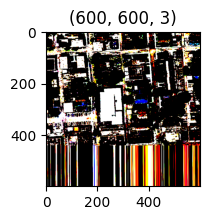

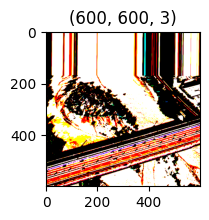

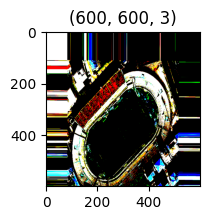

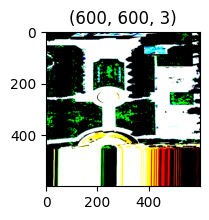

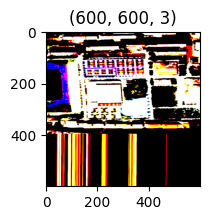

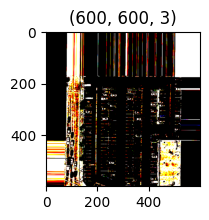

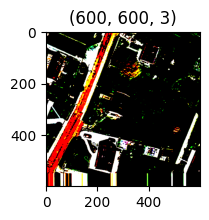

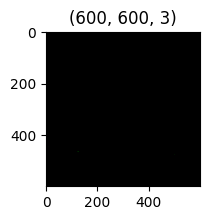

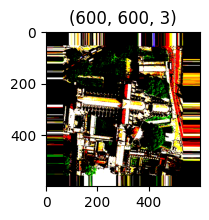

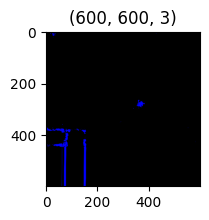

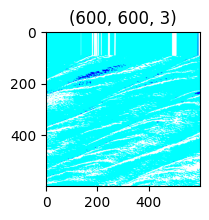

In [ ]:
plot_images(t_img,label)

**Training the model weights**

In [ ]:
from keras.callbacks import ModelCheckpoint , EarlyStopping
model_check=ModelCheckpoint(filepath='./best_model.h5',
                   monitor='accuracy',
                   verbose=1,
                   save_best_only=True)
early_stop=EarlyStopping(monitor='accuracy',
                 min_delta=0.01,
                 patience=5,
                 verbose=1)
call_back=[model_check,early_stop]

In [ ]:
history=model.fit(train_generator,steps_per_epoch=10, epochs=30, callbacks=call_back)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 9.8113 - accuracy: 0.1219
Epoch 1: accuracy improved from -inf to 0.12188, saving model to ./best_model.h5
10/10 [==============================] - 66s 3s/step - loss: 9.8113 - accuracy: 0.1219
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 9.1009 - accuracy: 0.1500
Epoch 2: accuracy improved from 0.12188 to 0.15000, saving model to ./best_model.h5
10/10 [==============================] - 34s 3s/step - loss: 9.1009 - accuracy: 0.1500
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 3.7710 - accuracy: 0.3625
Epoch 3: accuracy improved from 0.15000 to 0.36250, saving model to ./best_model.h5
10/10 [==============================] - 33s 3s/step - loss: 3.7710 - accuracy: 0.3625
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 1.9787 - accuracy: 0.4406
Epoch 4: accuracy improved from 0.36250 to 0.44063, saving model to ./best_model.h5
10/10 [=======================

In [ ]:
l=list({'Airport': 0,
 'BareLand': 1,
 'BaseballField': 2,
 'Beach': 3,
 'Bridge': 4,
 'Center': 5,
 'Church': 6,
 'Commercial': 7,
 'DenseResidential': 8,
 'Desert': 9,
 'Farmland': 10,
 'Forest': 11,
 'Industrial': 12,
 'Meadow': 13,
 'MediumResidential': 14,
 'Mountain': 15,
 'Park': 16,
 'Parking': 17,
 'Playground': 18,
 'Pond': 19,
 'Port': 20,
 'RailwayStation': 21,
 'Resort': 22,
 'River': 23,
 'School': 24,
 'SparseResidential': 25,
 'Square': 26,
 'Stadium': 27,
 'StorageTanks': 28,
 'Viaduct': 29})



**Defining the function for predicting the class**

In [ ]:
def predict(img):
  img=Image.open(img)
  img=np.array(img)
  img=preprocess_input(img)
  input_arr=np.array([img])
  input_arr.shape
  pred=np.argmax(model.predict(input_arr))
  for i,j in enumerate(l):
    if pred==i:
      return j


**Getting validation score**

In [ ]:
file_dict={'filename':val_generator.filepaths}
df=pd.DataFrame(file_dict)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [ ]:
def classify(x):
  list=x.split('/')
  for i,j in enumerate(l):
    if j in list:
      return i

In [ ]:
df['class']=df['filename'].apply(classify)

In [ ]:
df['pred_class']=df['filename'].apply(predict)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


In [ ]:
def class_to_number(x):
  for i,j in enumerate(l):
    if x==j:
      return i

In [ ]:
df

,filename,class,pred_class
0,/content/AID/Airport/airport_1.jpg,0,Airport
1,/content/AID/Airport/airport_10.jpg,0,Airport
2,/content/AID/Airport/airport_100.jpg,0,Airport
3,/content/AID/Airport/airport_101.jpg,0,Airport
4,/content/AID/Airport/airport_102.jpg,0,Airport
...,...,...,...
995,/content/AID/Viaduct/viaduct_132.jpg,29,Airport
996,/content/AID/Viaduct/viaduct_133.jpg,29,Viaduct
997,/content/AID/Viaduct/viaduct_134.jpg,29,Viaduct
998,/content/AID/Viaduct/viaduct_135.jpg,29,Viaduct


In [ ]:
df['pred_class']=df['pred_class'].apply(class_to_number)

**F1 score**

In [ ]:
print(f1_score(df['class'],df['pred_class'],average='macro'))

0.7032561398389972


In [ ]:
from keras.models import load_model

In [ ]:
model=load_model('/content/best_model.h5')

In [ ]:
h=history.history
h.keys()

dict_keys(['loss', 'accuracy'])

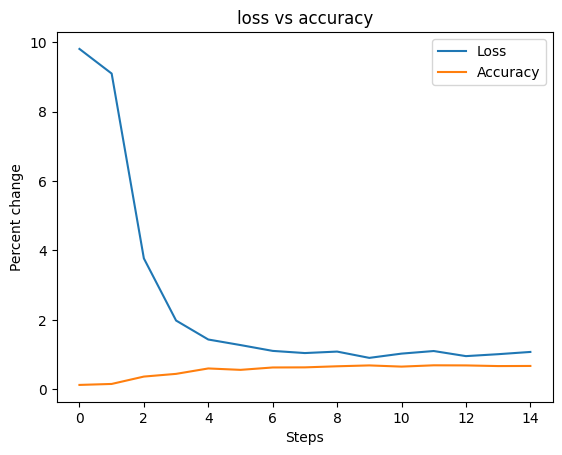

In [ ]:
plt.plot(h['loss'])
plt.plot(h['accuracy'])
# plt.plot(h['accuracy'])
plt.title('loss vs accuracy')
plt.xlabel('Steps')
plt.ylabel('Percent change')
plt.legend(["Loss","Accuracy"])
plt.show()